<a href="https://colab.research.google.com/github/chinge55/Poem-Generator/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
PATH =  "/content/drive/MyDrive/word2vec_models/nepali_embeddings_word2vec.txt"

In [9]:
from gensim.models import KeyedVectors

In [10]:
model = KeyedVectors.load_word2vec_format(PATH, binary=False)

In [12]:
model.similarity('फेसबूक','इन्स्टाग्राम')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.6848251

In [16]:
model.most_similar('हेटौडा')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('हेटौंडा', 0.7888251543045044),
 ('हेटौँडा', 0.7715580463409424),
 ('हेटाैंडा', 0.7254653573036194),
 ('हेटांैडा', 0.677879810333252),
 ('पदमपोखरी', 0.6223083734512329),
 ('बुटवल', 0.6162656545639038),
 ('सिमरा', 0.5966447591781616),
 ('बिराटनगर', 0.5812625288963318),
 ('बुटबल', 0.5734950304031372),
 ('इटहरी', 0.5695759654045105)]

In [1]:
!git clone https://github.com/devkotasawal1/Poem-Generator

fatal: destination path 'Poem-Generator' already exists and is not an empty directory.


In [15]:
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import matplotlib.pyplot as plt

In [3]:
with open ("Poem-Generator/lspd.txt","r") as f:
  corpus=f.read()

In [4]:
char=sorted(list(set(corpus)))

encoding={c:i for i,c in enumerate(char)}
decoding={i:c for i,c in enumerate(char)}

print(encoding)
print(decoding)
print("Unique characters "+str(len(char)))
print("Total characters "+str(len(corpus)))

{'\n': 0, ' ': 1, '!': 2, ',': 3, '.': 4, ':': 5, ';': 6, '?': 7, 'ँ': 8, 'ं': 9, 'ः': 10, 'अ': 11, 'आ': 12, 'इ': 13, 'ई': 14, 'उ': 15, 'ऊ': 16, 'ऋ': 17, 'ए': 18, 'ऐ': 19, 'ओ': 20, 'औ': 21, 'क': 22, 'ख': 23, 'ग': 24, 'घ': 25, 'ङ': 26, 'च': 27, 'छ': 28, 'ज': 29, 'झ': 30, 'ञ': 31, 'ट': 32, 'ठ': 33, 'ड': 34, 'ढ': 35, 'ण': 36, 'त': 37, 'थ': 38, 'द': 39, 'ध': 40, 'न': 41, 'प': 42, 'फ': 43, 'ब': 44, 'भ': 45, 'म': 46, 'य': 47, 'र': 48, 'ल': 49, 'व': 50, 'श': 51, 'ष': 52, 'स': 53, 'ह': 54, 'ा': 55, 'ि': 56, 'ी': 57, 'ु': 58, 'ू': 59, 'ृ': 60, 'े': 61, 'ै': 62, 'ो': 63, 'ौ': 64, '्': 65, 'ॐ': 66, '।': 67, '\u200d': 68, '–': 69, '‘': 70, '’': 71, '“': 72, '”': 73}
{0: '\n', 1: ' ', 2: '!', 3: ',', 4: '.', 5: ':', 6: ';', 7: '?', 8: 'ँ', 9: 'ं', 10: 'ः', 11: 'अ', 12: 'आ', 13: 'इ', 14: 'ई', 15: 'उ', 16: 'ऊ', 17: 'ऋ', 18: 'ए', 19: 'ऐ', 20: 'ओ', 21: 'औ', 22: 'क', 23: 'ख', 24: 'ग', 25: 'घ', 26: 'ङ', 27: 'च', 28: 'छ', 29: 'ज', 30: 'झ', 31: 'ञ', 32: 'ट', 33: 'ठ', 34: 'ड', 35: 'ढ', 36: 'ण', 37: 'त', 38:

In [5]:
sentence_length=60
step=1
sentences=[]
nextchar=[]

In [6]:
for i in range (0,len(corpus)-sentence_length,step):
  sentences.append(corpus[i:i+sentence_length])
  nextchar.append(corpus[i+sentence_length])
  
  
print("Train set length "+str(len(nextchar)))

Train set length 119102


In [7]:
x=np.zeros((len(sentences),sentence_length,len(char)),dtype=np.bool)
y=np.zeros((len(sentences),len(char)),dtype=np.bool)

In [8]:
for i,sentence in enumerate(sentences):
  for t,character in enumerate(sentence):
    x[i,t,encoding[character]]=1
  y[i,encoding[nextchar[i]]]=1
  
print("Training set(X) shape"+str(x.shape))
print("Training set(Y) shape"+str(y.shape))

Training set(X) shape(119102, 60, 74)
Training set(Y) shape(119102, 74)


In [11]:
keras.backend.clear_session()
model=Sequential()
model.add(LSTM(256,input_shape=(sentence_length,len(char))))
model.add(Dense(len(char)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['acc'])

In [12]:
file_path="weights-{epoch:02d}-{loss:.3f}.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor="loss", verbose=1, save_best_only=True, mode="min")
callbacks = [checkpoint]

In [13]:
history = model.fit(x,y,epochs=30,batch_size=128, validation_split = 0.2, callbacks=callbacks)


Epoch 1/30
744/745 [============================>.] - ETA: 0s - loss: 3.0247 - acc: 0.2255
Epoch 00001: loss improved from inf to 3.02450, saving model to weights-01-3.024.hdf5
745/745 [==============================] - 8s 11ms/step - loss: 3.0245 - acc: 0.2255 - val_loss: 2.7420 - val_acc: 0.2744
Epoch 2/30
743/745 [============================>.] - ETA: 0s - loss: 2.5885 - acc: 0.2988
Epoch 00002: loss improved from 3.02450 to 2.58848, saving model to weights-02-2.588.hdf5
745/745 [==============================] - 8s 10ms/step - loss: 2.5885 - acc: 0.2988 - val_loss: 2.5938 - val_acc: 0.3049
Epoch 3/30
745/745 [==============================] - ETA: 0s - loss: 2.4561 - acc: 0.3265
Epoch 00003: loss improved from 2.58848 to 2.45609, saving model to weights-03-2.456.hdf5
745/745 [==============================] - 8s 11ms/step - loss: 2.4561 - acc: 0.3265 - val_loss: 2.5152 - val_acc: 0.3204
Epoch 4/30
744/745 [============================>.] - ETA: 0s - loss: 2.3571 - acc: 0.3491
Epoc

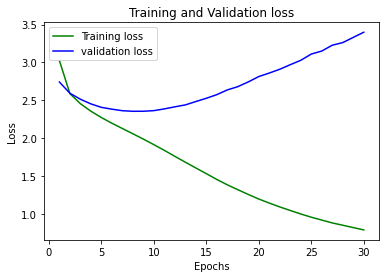

In [16]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(history.history['acc'])+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
non_starting_char=['\n', ' ', '!', ',', '.', ':', ';', '?', 'ँ', 'ं', 'ः','ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'े', 'ै', 'ो', 'ौ', '्', '।', '\u200d', '–', '‘', '’', '“', '”']
sentence_length=60
seed_starting_index = np.random.randint(0, len(corpus) - sentence_length)
chars = sorted(list(set(corpus)))


In [26]:
seed_starting_index

35401

In [27]:
while corpus[seed_starting_index] in non_starting_char:
	seed_starting_index+=10

In [28]:
seed_sentence = corpus[seed_starting_index:seed_starting_index + sentence_length]

In [29]:
seed_sentence

'यो सम्झी लेऊ न !\nचार नै दिनको यो पापी चोला, यो मैलो गुमानी,\n'

In [31]:
X_predict = np.zeros((1, sentence_length, len(chars)), dtype=np.bool)
X_predict.shape

(1, 60, 74)

In [32]:
for i, char in enumerate(seed_sentence):
    X_predict[0, i, encoding[char]] = 1

In [38]:
generated = ""
for i in range(170):
    prediction = np.argmax(model.predict(X_predict))
    generated += decoding[prediction]
    activations = np.zeros((1, 1, len(chars)), dtype=np.bool)
    activations[0, 0, prediction] = 1
    X_predict = np.concatenate((X_predict[:, 1:, :], activations), axis=1)

In [40]:
generated

'पखेली रे ! कमरबर्स यो संसार छ !\nमानवता किन हो भिजेका तीर !\nमास्काको मुणा हो !\nस्वप्नकी तालुनली !\nजादूका तर समै अन्ठुलो बोलिन्छ, जोति भित्र\nकल्पनाको लाना हामीलाई जलका जगत्'